<a href="https://colab.research.google.com/github/lmendezayl/modelado-continuo/blob/main/trabajos-practicos/TP2IMC2025_MENDEZ_STANGALINI_DRELEWICZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2025 - Cátedra Mindlin
# **Trabajo Práctico 2**

Este es el trabajo práctico de los ejes temáticos 2 y 3. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **domingo 16 de noviembre, inclusive**. El trabajo es en **grupos de entre 2 y 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP2IMC2025_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte teórica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


---
# Ejercicio 1

Sea la siguiente función definida a trozos

$$
f(x) =
\begin{cases}
1 + 2x & \text{si } -1 \leq x \leq 0 \\
1 - 2x & \text{si } 0 \leq x \leq 1 \\
\end{cases}
$$

1.1. Defina una función de Python que permita calcular los valores de la función para el dominio correspondiente, y grafiquela.


In [ ]:
def f(x):
    if not (-1 <= x or x <= 1):
        return None
    return 1 - 2 * abs(x)

In [ ]:
print(f(0.2))

0.6



1.2. La función tiene una paridad definida. Es par o impar? Mostrar con las herramientas numéricas que considere, evidencias que abonen a su especulación?


La función es par ya que se cumple que $f(-x) = f(x)$. Es trivial ver que si $x \in [0,1]$, entonces $-x \in [-1,0]$. Entonces
$$f(-x) = 1+2(-x) = 1-2x = f(x)$$

Idem para $x \in [-1,0]$. Entonces $f$ es par.




Además, se puede ver graficamente que la funcion cumple con la simétria de una función par (funcion tipo coseno, que es par):

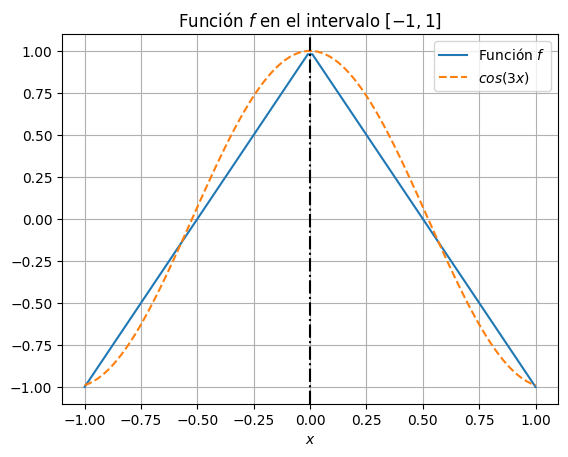

In [ ]:
N = 100
xs = np.linspace(-1, 1, N)
y = []

for x in xs:
    y.append(f(x))

plt.plot(xs, y, label="Función $f$")
plt.plot(xs, np.cos(3*xs), label='$cos(3x)$', linestyle='--')
plt.axvline(x=0, color='black', linestyle='-.')

plt.title("Función $f$ en el intervalo $[-1,1]$")
plt.xlabel("$x$")
plt.grid()
plt.legend()


1.3. Suponiendo que quiere aproximar la función definida en este dominio acotado por un desarrollo de Fourier con las consideraciones correspondientes, por ejemplo acerca del periodo. Calcule los coeficientes de Fourier hasta order N=8. Haga los gráficos en los que se vean cuánto aporta cada coeficiente a la serie.


Sabemos que como es una función par, los terminos $b_n = 0$ para todo $n \in \mathbb{N}$.

Entonces solo resta calcular los coeficientes de los $a_n$. Definimos la función `coeffs` para calcularlos.

In [ ]:
def coeffs(f, L: float | int, dh: int, N: int) -> tuple[float, list[float], list[float]]:
    """
    Calcula los coeficientes de la serie de Fourier de una funcion f desde -L
    hasta L usando la regla del trapecio con dh puntos, truncada en N términos.
    """

    x = np.linspace(-L, L, dh)

    coeffs_a: list[float] = []
    coeffs_b: list[float] = []

    a_0: float = (1/L) * np.trapezoid(f(x), x)

    for n in range(1, N+1):
        a_n: float = (1/L) * np.trapezoid(f(x)*np.cos((n*np.pi*x)/L), x)
        b_n: float = (1/L) * np.trapezoid(f(x)*np.sin((n*np.pi*x)/L), x)
        coeffs_a.append(a_n)
        coeffs_b.append(b_n)

    res = (a_0,
           ([round(coeffs_a[k-1], 4) for k in range(1, len(coeffs_a))]),
           ([round(coeffs_b[k-1], 4) for k in range(1, len(coeffs_b))]))
    return res

In [ ]:
L = 1
dh = 100
N = 8

a_0, a_n, b_n = coeffs(f, L, dh, N)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


1.4. Calcule y grafique la estimación de la función con una serie de Fourier truncada a N=8 términos usando los coeficientes obtenidos previamente.

---
# Ejercicio 2

Imagine un lanzamiento vertical de una pelota de básquet (modelo unidimensional vertical) desde el suelo en ($t=0$). La única aceleración es la gravedad ($g=9.8 m/s^{2}$) (sin rozamiento). Queremos que la pelota alcance la altura del aro ($H=3.05 m$) exactamente en $t=T=1.2 s$. El problema está descrito por la siguiente ecuación diferencial

$$
y''(t) = -g,\qquad t\in[0,T],
$$

con condiciones de contorno $y(0)=0$; $y(T)=H$.

2.1. Plantear una resolución del problema con el método de diferencias finitas usando diferencias centrales. Mostrar explícitamente cómo es la matriz de diferenciación usada y cómo queda planteado el problema de manera algebraica (hacer print() de las variables correspondientes). Resolver el problema algebraico usando `np.linalg.solve`. Graficar la solución junto con las condiciones de contorno, para visualizar su cumplimiento.

2.2. Estimar el valor de la velocidad inicial necesaria para lograr el tiro usando diferencias finitas con el método forward.

2.3. Agregar a la ecuación un término disipativo que podría ser el rozamiento con el aire. Considere un coeficiente de rozamiento $\gamma=2$ y resuelva con diferencias centrales. Cómo debería ser la velocidad inicial para este caso?

---